In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('task2.csv')

In [3]:
!pip install keras

In [4]:
!pip install tensorflow

In [5]:
from keras.models import Sequential
# creates a linear stack of layers
from keras.layers import Dense
# connects the layers, takes input from the previous layer, applies a weight and generates an output
from keras.layers import LSTM
# Long short term memory - performs time - series analysis on the data
from keras.layers import Dropout
# prevents overfitting 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [10]:
df1 = df.reset_index()['Close']

In [11]:
df1

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

Text(0.5, 1.0, 'CLOSING GRAPH OF STOCK-MARKET')

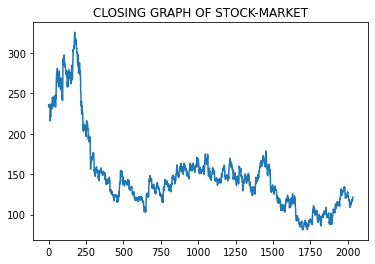

In [12]:
plt.plot(df1)
plt.rcParams['figure.figsize'] = [15,7]
plt.title('CLOSING GRAPH OF STOCK-MARKET')

In [14]:
df1.min()


80.95

In [15]:
df1.max()

325.75

In [16]:
df1.mean()

149.45027027027015

In [17]:
#applying min max scaler to the data
from sklearn.preprocessing import MinMaxScaler

In [18]:
mm = MinMaxScaler()

In [22]:
df1 = df1.reshape(-1,1)

In [23]:
df2 = mm.fit_transform(df1)

In [24]:
df2

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
train_size = len(df2)*0.75

In [40]:
ts

1526

In [28]:
test_size = len(df2) - train_size

In [31]:
ts = int(train_size)

In [32]:
tes = int(test_size)

In [34]:
train_data = df2[:ts,:]
test_data = df2[ts:len(df2),:]

In [35]:
def select_data(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        dataX.append(dataset[i:(i+time_step), 0])
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [36]:
timestep = 200

X_train, y_train = select_data(train_data, timestep)
X_test, y_test = select_data(test_data, timestep)

In [37]:
X_test, y_test


(array([[0.1621732 , 0.15972222, 0.16278595, ..., 0.03819444, 0.02839052,
         0.02369281],
        [0.15972222, 0.16278595, 0.17340686, ..., 0.02839052, 0.02369281,
         0.02920752],
        [0.16278595, 0.17340686, 0.14174837, ..., 0.02369281, 0.02920752,
         0.02328431],
        ...,
        [0.06944444, 0.08088235, 0.07700163, ..., 0.14562908, 0.15236928,
         0.15400327],
        [0.08088235, 0.07700163, 0.0684232 , ..., 0.15236928, 0.15400327,
         0.14971405],
        [0.07700163, 0.0684232 , 0.06781046, ..., 0.15400327, 0.14971405,
         0.1621732 ]]),
 array([0.02920752, 0.02328431, 0.01919935, 0.00653595, 0.00061275,
        0.00796569, 0.01245915, 0.01981209, 0.01940359, 0.02246732,
        0.03125   , 0.02348856, 0.0249183 , 0.02144608, 0.04840686,
        0.04575163, 0.03962418, 0.03921569, 0.04758987, 0.04513889,
        0.04166667, 0.04125817, 0.05044935, 0.05555556, 0.05494281,
        0.05412582, 0.0435049 , 0.04799837, 0.05147059, 0.05065359,
 

In [38]:

X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [39]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(timestep,1)))
model.add(Dropout(0.2))

model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()
model.fit(X_train, y_train, validation_data = (X_test, y_test),epochs = 50,batch_size = 32, verbose=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 200, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 200, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 200, 50)           20200     
                                                                 
 dropout_1 (Dropout)         (None, 200, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 5


KeyboardInterrupt



In [42]:

#------------DOING PREDICTIONS --------------

train_predict=model.predict(X_train)       # output for train dataset
test_predict=model.predict(X_test)        # output for test dataset

#----------------- BACK TO ORIGINAL DATA ------------------
train_predict=mm.inverse_transform(train_predict)
test_predict=mm.inverse_transform(test_predict)

10/10 [==============================] - 1s 74ms/step


In [46]:


t = timestep

p1 = np.empty_like(df1)       #train-pred-plot
p1[:,:] =np.nan
p1[t : len(train_predict)+t , : ] =  train_predict

In [47]:

p2 = np.empty_like(df1)       #test-pred-plot
p2[:,:] =np.nan
p2[ len(train_predict)+ t*2 + 1 : len(df1) -1 , : ] =  test_predict

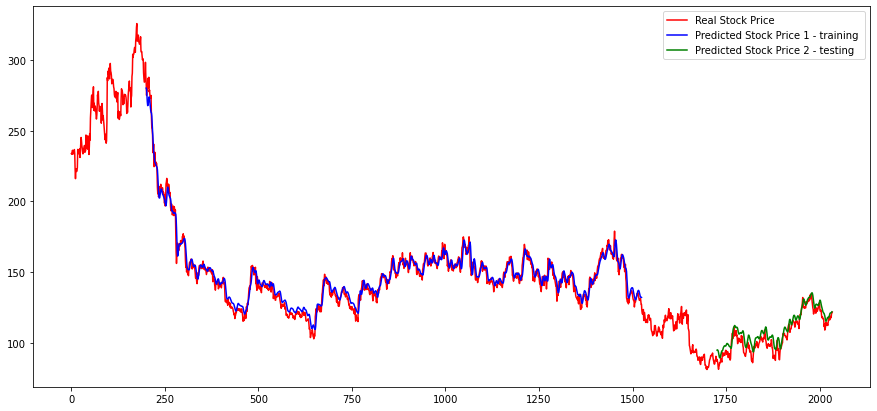

In [50]:
from matplotlib.pyplot import figure
plt.plot(mm.inverse_transform(df2) , color = 'red', label = 'Real Stock Price')
plt.plot(p1 , color = 'blue', label = 'Predicted Stock Price 1 - training ')
plt.plot(p2 , color = 'green', label = 'Predicted Stock Price 2 - testing ')

plt.rcParams['figure.figsize'] = [15,7]
plt.legend()
plt.show()